# Taylor Swift Concerts Tour Analysis

## 1. Introduction

**Name**: Hafiz Alfariz

**Dataset**: [Taylor Concert Tours Impact on Attendance and Revenue](https://www.kaggle.com/datasets/gayu14/taylor-concert-tours-impact-on-attendance-and?resource=download)  
This dataset contains information on Taylor Swift's concert tours from 2009 to 2018, including location, venue, tickets sold, venue capacity, concert revenue, and opening acts. The primary sources are Wikipedia and official publications, ensuring data reliability. The dataset is used to statistically and visually analyze the performance of Taylor Swift's tours and to answer various business questions related to promotional strategies, venue selection, and the impact of opening acts on attendance and revenue.

---

### Background

The music concert industry faces significant challenges in identifying the key factors that drive the success of artist tours, such as those of Taylor Swift. Artist management and event organizers need to understand which venues are most profitable, attendance patterns across different locations, and the impact of the number of opening acts on ticket sales and revenue. Without structured analysis of historical data, decisions regarding venue selection, promotional strategies, and opening act arrangements are often suboptimal, making it difficult to maximize ROI and fan satisfaction.

This study aims to answer the following business questions quantitatively:
- Which venues generate the highest revenue (≥ $5 million)?
- Does the attendance rate at major venues reach ≥ 90%?
- How significant is the impact of the number of opening acts on ticket sales?

This data-driven analysis is expected to help promoters, artist management, and business analysts design more effective and profitable tour strategies.

---

### SMART

| SMART      | Description |
|------------|-------------|
| Specific   | Analyze the performance of Taylor Swift's tours based on location, attendance, revenue, and opening acts data. |
| Measurable | - Calculate the average revenue per venue and number of attendees per tour, targeting venues generating ≥ $5 million.<br>- Measure attendance rate with a target of ≥ 90% for venues with popular opening acts.<br>- Assess Spearman correlation between the number of opening acts and spikes in attendance, with a correlation value ≥ 0.3 considered significant.<br>- Provide at least 3 key performance metrics: revenue, attendance rate, and opening act impact score. |
| Achievable | Produce visualizations of revenue trends, attendee numbers, and the most successful venues for at least 5 major tours. |
| Relevant   | This analysis is relevant for concert promoters, artist management, and fans seeking to understand the business and strategic impact of tours. |
| Time-Bound | The analytics project and interactive dashboard are targeted for completion within 2 weeks, covering tour data from 2009 to 2018. |

---

### Problem Statement

Artist tour management and event organizers often lack data-driven insights regarding the most profitable venues, attendance patterns across locations, and the impact of the number of opening acts on ticket sales and tour revenue. Without an analytical dashboard that can quantitatively answer these questions, strategies for promotion, venue selection, and opening act arrangements tend to be suboptimal, making it difficult to maximize ROI and fan satisfaction. This analysis aims to provide a data-based solution to enable more effective and measurable business decision-making.

---

### Target Audience

- Concert marketing teams seeking to optimize promotional strategies, venue selection, and tour scheduling based on historical performance data.
- Business analysts in the entertainment industry who require quantitative insights to support decision-making and business planning.
- Event organizers and artist management designing tour schedules, selecting venues, and determining opening act strategies to maximize ROI and audience satisfaction.
- Media and fans interested in understanding the business factors and popularity behind the success of global artist tours like Taylor Swift.

---

## 2. Import Library

In [1]:
# Import Libraries

import pandas as pd                # For data manipulation and analysis
import matplotlib.pyplot as plt    # For creating static plots and charts
import seaborn as sns              # For enhanced statistical data visualization
import numpy as np                 # For numerical operations and array handling
import plotly.express as px        # For interactive visualizations (quick plots)
import plotly.graph_objects as go  # For advanced interactive visualizations
from collections import Counter    # For counting opening acts
from scipy.stats import ttest_ind, norm, skew, kurtosis, spearmanr  # For statistical analysis

---

## 2. Data Loading

### 2.1 Loading Data

In [2]:
# 'encoding="latin1"' is used to handle special characters in the data.
df = pd.read_csv('Taylor_Train.csv', encoding='latin1')

# Display the first five rows of the dataframe to check the data structure and contents.
df.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana\r\nKellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana\r\nKellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana\r\nKellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana\r\nKellie Pickler,,,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana\r\nKellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


### 2.2 Data Info

In [3]:
# Dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   City                                   445 non-null    object
 1   Country                                445 non-null    object
 2   Venue                                  445 non-null    object
 3   Opening act(s)                         444 non-null    object
 4   Attendance (tickets sold / available)  442 non-null    object
 5   Revenue                                442 non-null    object
 6   Tour                                   445 non-null    object
dtypes: object(7)
memory usage: 24.5+ KB


### 2.3 Check Missing Value

In [4]:
# Check Missing Values

print(df.isnull().sum())

City                                     0
Country                                  0
Venue                                    0
Opening act(s)                           1
Attendance (tickets sold / available)    3
Revenue                                  3
Tour                                     0
dtype: int64


### 2.4 Dataset Dimensions.

In [5]:
# Print the number of rows and columns in the dataset.
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 445 rows and 7 columns.


### 2.5 Check Duplicate

In [6]:
# Check for Duplicates
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())


Number of duplicate rows:
112


### 2.6 Statistic Description

In [7]:
# Get a statistical summary of the dataset
df.describe()


,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
count,445,445,445,444,442,442,445
unique,143,24,206,41,295,296,5
top,Los Angeles,United States,Staples Center,Gloriana\r\nKellie Pickler,,,Fearless_Tour
freq,16,314,16,85,35,36,111


---

## 3. Data Cleaning

### 3.1. Rename Columns for Consistency

Purpose: Standardize column names to make them clearer and easier to use in analysis.

In [8]:
# Rename columns for consistency and easier analysis
df.rename(columns={
    'Opening act(s)': 'Opening_Act',
    'Attendance (tickets sold / available)': 'Attendance',
}, inplace=True)

Purpose: Standardize column names to make them clearer and easier to use in analysis.

### 3.2. Split Attendance Column into Two Numeric Variables

Purpose: Separate the number of tickets sold and available as the basis for attendance rate analysis.

In [9]:
# Split Attendance column into two numeric variables for analysis
df['Attendance_str'] = df['Attendance'].astype(str)
df[['Tickets_Sold', 'Tickets_Available']] = df['Attendance_str'].str.split('/', expand=True)

Purpose: Separate the number of tickets sold and available as the basis for attendance rate analysis. By splitting the `Attendance` column into `Tickets_Sold` and `Tickets_Available`, we can calculate the attendance rate for each concert. This enables more accurate statistical analysis, such as identifying concerts with high occupancy, comparing venue performance, and correlating attendance rates with other factors (e.g., number of opening acts, revenue). The resulting variables are essential for answering business questions about venue effectiveness and fan engagement.

### 3.3 Cleaning Invalid Characters and Converting to Float

Purpose: Clean non-numeric characters and convert `Tickets_Sold`, `Tickets_Available`, and `Revenue` columns to float for accurate statistical analysis.

In [10]:
# Cleaning non-numeric characters and converting to float
for col in ['Tickets_Sold', 'Tickets_Available']:
    df[col] = (
        df[col]
        .astype(str)
        .replace({'\\x97': pd.NA, '—': pd.NA, '<NA>': pd.NA, 'None': pd.NA, 'nan': pd.NA})
        .str.replace(r'[^0-9.]', '', regex=True)
        .str.strip()
        .replace('', pd.NA)
        .astype('Float64')
    )

df['Revenue'] = (
    df['Revenue']
    .astype(str)
    .replace({'\\x97': pd.NA, '—': pd.NA, '<NA>': pd.NA, 'None': pd.NA, 'nan': pd.NA})
    .str.replace(r'[^0-9.]', '', regex=True)
    .str.strip()
    .replace('', pd.NA)
    .astype('Float64')
)

Many entries contain symbols (e.g., em dash, comma, currency sign) or corrupted characters that prevent direct numeric conversion. By replacing these with `NaN` and removing formatting, we ensure all values are ready for calculation and visualization. This step is crucial for producing valid descriptive statistics, enabling correlation analysis, and supporting business decisions based on reliable data.

### 3.4. Fill Missing Values in Opening_Act Column with "Unknown"

In [11]:
# Fill missing or invalid values in the Opening_Act column with "Unknown"

df['Opening_Act'] = df['Opening_Act'].replace({
    '\x97': pd.NA, '—': pd.NA, '<NA>': pd.NA, 'None': pd.NA, 'nan': pd.NA, '': pd.NA
})
df['Opening_Act'] = df['Opening_Act'].fillna('Unknown')

Filling missing values in Opening_Act with "Unknown" ensures clean, consistent categorical data, enabling more accurate and actionable analysis of concert performance.

### 3.5. Remove Helper Columns

Purpose: Delete temporary columns (such as `Attendance_str`) that were only needed for intermediate data transformation. This keeps the dataset efficient and clean, ensuring only relevant columns remain for analysis and visualization.

In [12]:
# Remove temporary/helper column after splitting Attendance
df.drop(columns=['Attendance_str'], inplace=True)

### 3.6. Feature Engineering: Attendance Rate & Opening Act Count

Purpose: Calculate `Attendance_Rate` and count the number of opening acts (`Opening_Act_Count`) for each concert. These engineered features support descriptive statistics, visualizations, and answer SMART indicators related to attendance and opening act impact.

In [13]:
df['Attendance_Rate'] = df['Tickets_Sold'] / df['Tickets_Available']
df['Opening_Act'] = df['Opening_Act'].str.replace('\r\n', ', ').str.strip()
df['Opening_Act_Count'] = df['Opening_Act'].apply(
    lambda x: len([act for act in str(x).split(',') if act.strip()]) if pd.notna(x) else 0
)

### 3.7 Create Imputation Flags
Purpose: Track rows with missing values for Revenue and Attendance to support transparent analysis and filtering during statistical tests.

In [14]:
# Create Imputation and Duplicate Flags
df['Revenue_Imputed'] = df['Revenue'].isna()
df['Attendance_Imputed'] = df['Tickets_Sold'].isna() | df['Tickets_Available'].isna()
df['Full_Duplicate'] = df.duplicated(subset=['City', 'Venue', 'Tour', 'Tickets_Sold', 'Revenue'], keep=False)

### 3.8. Duplicate Detection and Classification

Purpose: Identify and classify duplicate rows to ensure aggregate calculations for revenue and attendance are accurate. Only fully duplicated rows are safe to remove.

In [15]:
# Flag full duplicates (identical City, Venue, Tour, Tickets_Sold, Tickets_Available, Revenue)
df['Full_Duplicate'] = df.duplicated(
    subset=['City', 'Venue', 'Tour', 'Tickets_Sold', 'Tickets_Available', 'Revenue'],
    keep=False
)

# Flag partial duplicates (same City, Venue, Tour but different performance data)
df['Partial_Duplicate'] = (
    df.duplicated(subset=['City', 'Venue', 'Tour'], keep=False) & ~df['Full_Duplicate']
)

### 3.9. Remove Attendance Column

Purpose: After splitting and cleaning the `Attendance` column into `Tickets_Sold` and `Tickets_Available`, the original `Attendance` column is no longer needed. Removing it keeps the dataset concise and focused on relevant numeric variables for analysis.

In [16]:
df= df.drop(columns=['Attendance'])

### 3.10. Duplicate Count for Decision Making

Purpose: Count the number of full and partial duplicates to inform decisions about data cleaning and aggregation. This helps ensure that only valid, non-redundant records are used in analysis.

In [17]:
# Count the number of full and partial duplicates for decision making
full_duplicates_count = df['Full_Duplicate'].sum()
partial_duplicates_count = df['Partial_Duplicate'].sum()

print(f"Number of Full Duplicates (completely identical rows): {full_duplicates_count}")
print(f"Number of Partial Duplicates (same City, Venue, Tour but different other data): {partial_duplicates_count}")

# Show all full duplicate rows
print("Full Duplicate Rows:")
print(df[df['Full_Duplicate']])

Number of Full Duplicates (completely identical rows): 204
Number of Partial Duplicates (same City, Venue, Tour but different other data): 5
Full Duplicate Rows:
            City        Country                   Venue  \
7         London        England  Shepherd's Bush Empire   
8         London        England  Shepherd's Bush Empire   
56      Rosemont  United States          Allstate Arena   
57      Rosemont  United States          Allstate Arena   
62        Sydney      Australia              Acer Arena   
..           ...            ...                     ...   
430  Minneapolis  United States       U.S. Bank Stadium   
436    Arlington  United States            AT&T Stadium   
437    Arlington  United States            AT&T Stadium   
443        Tokyo          Japan              Tokyo Dome   
444        Tokyo          Japan              Tokyo Dome   

                    Opening_Act     Revenue                     Tour  \
7                       Unknown    401328.0            Fe

### 3.11. Remove Full Duplicates and Validate Results

In [18]:
# Remove full duplicates based on key columns
df_cleaned = df.drop_duplicates(subset=['City', 'Venue', 'Tour', 'Tickets_Sold', 'Revenue'], keep='first')

print("\nDataFrame after removing Full Duplicates:")
print(df_cleaned.info())

# Check the number of full duplicates remaining after removal
full_duplicates_count_after = df_cleaned['Full_Duplicate'].sum()
print(f"\nNumber of Full Duplicates after removal: {full_duplicates_count_after}")


DataFrame after removing Full Duplicates:
<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 443
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                333 non-null    object 
 1   Country             333 non-null    object 
 2   Venue               333 non-null    object 
 3   Opening_Act         333 non-null    object 
 4   Revenue             295 non-null    Float64
 5   Tour                333 non-null    object 
 6   Tickets_Sold        296 non-null    Float64
 7   Tickets_Available   296 non-null    Float64
 8   Attendance_Rate     296 non-null    Float64
 9   Opening_Act_Count   333 non-null    int64  
 10  Revenue_Imputed     333 non-null    bool   
 11  Attendance_Imputed  333 non-null    bool   
 12  Full_Duplicate      333 non-null    bool   
 13  Partial_Duplicate   333 non-null    bool   
dtypes: Float64(4), bool(4), int64(1), object(5)
memory usage: 31.2+ KB
N

After removing full duplicates, the cleaned DataFrame contains **333 rows**. However, there are still **92 rows flagged as Full Duplicates**. This indicates that some rows remain marked as duplicates because the `Full_Duplicate` flag is based on the original DataFrame, not updated after the removal.

**Key points from the DataFrame after duplicate removal:**
- Most columns have complete data, but `Revenue`, `Tickets_Sold`, `Tickets_Available`, and `Attendance_Rate` still have missing values.
- The presence of remaining full duplicates suggests the flag should be recalculated on `df_cleaned` to accurately reflect the current state.
- Next steps should include updating the duplicate flags and handling missing values to ensure the dataset is fully clean for analysis.

**Actionable recommendation:**  
Recalculate the `Full_Duplicate` and `Partial_Duplicate` flags on `df_cleaned` to ensure no duplicate rows remain, and proceed to drop or impute missing values in key columns for robust statistical analysis.

### 3.12. Partial Duplicate Analysis on Cleaned Data

In [19]:
# Show rows that are partial duplicates in df_cleaned
partial_duplicates_df_cleaned = df_cleaned[df_cleaned['Partial_Duplicate']].sort_values(by=['City', 'Venue', 'Tour'])
print("\nPartial Duplicates in df_cleaned:")
display(partial_duplicates_df_cleaned[['City', 'Venue', 'Tour', 'Tickets_Sold', 'Tickets_Available', 'Revenue', 'Opening_Act', 'Opening_Act_Count', 'Revenue_Imputed', 'Attendance_Imputed']])

# Identify partial duplicates in df_cleaned that have complete Revenue and Attendance data
salvageable_partial_duplicates_cleaned = partial_duplicates_df_cleaned[
    (~partial_duplicates_df_cleaned['Revenue'].isna()) &
    (~partial_duplicates_df_cleaned['Tickets_Sold'].isna()) &
    (~partial_duplicates_df_cleaned['Tickets_Available'].isna())
].copy()

print("\nSalvageable Partial Duplicates in df_cleaned (with complete Revenue and Attendance data):")
display(salvageable_partial_duplicates_cleaned[['City', 'Venue', 'Tour', 'Tickets_Sold', 'Tickets_Available', 'Revenue', 'Opening_Act', 'Opening_Act_Count', 'Revenue_Imputed', 'Attendance_Imputed']])

# Further analysis: Group by City, Venue, Tour to see data variations within partial duplicate groups in df_cleaned
grouped_partial_duplicates_cleaned = partial_duplicates_df_cleaned.groupby(['City', 'Venue', 'Tour'])[
    ['Tickets_Sold', 'Tickets_Available', 'Revenue', 'Opening_Act', 'Opening_Act_Count']
].agg(list)

print("\nGrouped Partial Duplicates in df_cleaned (showing variations):")
display(grouped_partial_duplicates_cleaned)


Partial Duplicates in df_cleaned:


,City,Venue,Tour,Tickets_Sold,Tickets_Available,Revenue,Opening_Act,Opening_Act_Count,Revenue_Imputed,Attendance_Imputed
49,Dallas,American Airlines Center,Fearless_Tour,13794.0,13794.0,628062.0,"Gloriana, Kellie Pickler",2,False,False
73,Dallas,American Airlines Center,Fearless_Tour,14022.0,14022.0,742954.0,"Gloriana, Kellie Pickler",2,False,False
14,Los Angeles,Staples Center,Fearless_Tour,13648.0,13648.0,720940.0,"Gloriana, Kellie Pickler",2,False,False
304,Singapore,Singapore Indoor Stadium,The_Red_Tour,16344.0,16344.0,2524080.0,Imprompt-3,1,False,False
306,Singapore,Singapore Indoor Stadium,The_Red_Tour,<NA>,<NA>,<NA>,Imprompt-3,1,True,True



Salvageable Partial Duplicates in df_cleaned (with complete Revenue and Attendance data):


,City,Venue,Tour,Tickets_Sold,Tickets_Available,Revenue,Opening_Act,Opening_Act_Count,Revenue_Imputed,Attendance_Imputed
49,Dallas,American Airlines Center,Fearless_Tour,13794.0,13794.0,628062.0,"Gloriana, Kellie Pickler",2,False,False
73,Dallas,American Airlines Center,Fearless_Tour,14022.0,14022.0,742954.0,"Gloriana, Kellie Pickler",2,False,False
14,Los Angeles,Staples Center,Fearless_Tour,13648.0,13648.0,720940.0,"Gloriana, Kellie Pickler",2,False,False
304,Singapore,Singapore Indoor Stadium,The_Red_Tour,16344.0,16344.0,2524080.0,Imprompt-3,1,False,False



Grouped Partial Duplicates in df_cleaned (showing variations):


,,,Tickets_Sold,Tickets_Available,Revenue,Opening_Act,Opening_Act_Count
City,Venue,Tour,,,,,
Dallas,American Airlines Center,Fearless_Tour,"[13794.0, 14022.0]","[13794.0, 14022.0]","[628062.0, 742954.0]","[Gloriana, Kellie Pickler, Gloriana, Kellie Pi...","[2, 2]"
Los Angeles,Staples Center,Fearless_Tour,[13648.0],[13648.0],[720940.0],"[Gloriana, Kellie Pickler]",[2]
Singapore,Singapore Indoor Stadium,The_Red_Tour,"[16344.0, <NA>]","[16344.0, <NA>]","[2524080.0, <NA>]","[Imprompt-3, Imprompt-3]","[1, 1]"


- The code above identifies and displays all rows in the cleaned DataFrame (`df_cleaned`) that are flagged as partial duplicates, meaning they share the same City, Venue, and Tour but have different performance data (such as tickets sold or revenue).
- It then filters for partial duplicates that have complete (non-missing) values for Revenue, Tickets_Sold, and Tickets_Available, which are suitable for further analysis.
- Finally, it groups these partial duplicates by City, Venue, and Tour, aggregating their key columns into lists to visualize the variations within each group. This helps to understand if multiple concerts at the same location and tour have meaningful differences in their performance metrics.
- This step is important for ensuring that only valid, non-redundant records are used in subsequent statistical analysis and business insights.

In [20]:
# Display data for Singapore Indoor Stadium, The Red Tour after duplicate removal
singapore_red_tour_data_after_removal = df_cleaned[
    (df_cleaned['City'] == 'Singapore') &
    (df_cleaned['Venue'] == 'Singapore Indoor Stadium') &
    (df_cleaned['Tour'] == 'The_Red_Tour')
]

print("\nData for Singapore Indoor Stadium, The Red Tour in df_cleaned after duplicate removal:")
display(singapore_red_tour_data_after_removal)


Data for Singapore Indoor Stadium, The Red Tour in df_cleaned after duplicate removal:


,City,Country,Venue,Opening_Act,Revenue,Tour,Tickets_Sold,Tickets_Available,Attendance_Rate,Opening_Act_Count,Revenue_Imputed,Attendance_Imputed,Full_Duplicate,Partial_Duplicate
304,Singapore,Singapore,Singapore Indoor Stadium,Imprompt-3,2524080.0,The_Red_Tour,16344.0,16344.0,1.0,1,False,False,False,True
306,Singapore,Singapore,Singapore Indoor Stadium,Imprompt-3,<NA>,The_Red_Tour,<NA>,<NA>,<NA>,1,True,True,False,True


In [21]:
df_cleaned = df_cleaned.drop(306)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 332 entries, 0 to 443
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                332 non-null    object 
 1   Country             332 non-null    object 
 2   Venue               332 non-null    object 
 3   Opening_Act         332 non-null    object 
 4   Revenue             295 non-null    Float64
 5   Tour                332 non-null    object 
 6   Tickets_Sold        296 non-null    Float64
 7   Tickets_Available   296 non-null    Float64
 8   Attendance_Rate     296 non-null    Float64
 9   Opening_Act_Count   332 non-null    int64  
 10  Revenue_Imputed     332 non-null    bool   
 11  Attendance_Imputed  332 non-null    bool   
 12  Full_Duplicate      332 non-null    bool   
 13  Partial_Duplicate   332 non-null    bool   
dtypes: Float64(4), bool(4), int64(1), object(5)
memory usage: 31.1+ KB


For partial duplicates, I aim to retain other concert records, as there are cases where multiple shows are held in the same city and venue during a tour—these represent legitimate, separate events. However, the Singapore Indoor Stadium data for The Red Tour is incomplete, lacking essential information such as tickets sold, available seats, or revenue. Since these missing values are critical for statistical analysis and business insights, it is best to remove the Singapore entry to maintain the integrity and reliability of the dataset.

By selectively dropping only incomplete records while preserving valid duplicates, we ensure that the dataset accurately reflects all unique concert performances and supports robust analysis. This approach avoids losing valuable data from other cities and venues where multiple concerts occurred, while also preventing skewed results from incomplete entries.

### 3.13. Final Data Cleaning.

Since there are still missing values in several key columns such as revenue, tickets sold, and attendance, these rows are dropped from the dataset. Removing incomplete records is essential because missing data in these critical fields can significantly impact the accuracy and reliability of statistical analysis. By ensuring that only complete and valid data is used, the analysis results will be more robust and trustworthy for business decision-making.

In [22]:
# Record the initial number of rows before dropping missing values
initial_rows = len(df_cleaned)
print(f"Number of rows in df_cleaned before dropna: {initial_rows}")

# Remove rows with missing values in key columns to ensure data quality for analysis
df_cleaned = df_cleaned.dropna(subset=['Revenue', 'Tickets_Sold', 'Tickets_Available', 'Attendance_Rate']).copy()

# Drop helper/flag columns that are no longer needed
df_cleaned = df_cleaned.drop(columns=[
    'Revenue_Imputed', 
    'Attendance_Imputed', 
    'Full_Duplicate', 
    'Partial_Duplicate'
], errors='ignore')

# Record the number of rows after dropping incomplete records
rows_after_dropna = len(df_cleaned)
print(f"Number of rows in df_cleaned after dropna: {rows_after_dropna}")

# Confirm that there are no missing values remaining in the selected columns
print("\nMissing values after dropna:")
print(df_cleaned[['Revenue', 'Tickets_Sold', 'Tickets_Available', 'Attendance_Rate']].isnull().sum())

df_cleaned = df_cleaned.reset_index(drop=True)

df_cleaned.info()

# Print data clean to csv

df_cleaned.to_csv('taylor_swift_clean_data.csv', index=False)
df_cleaned.head()

Number of rows in df_cleaned before dropna: 332
Number of rows in df_cleaned after dropna: 295

Missing values after dropna:
Revenue              0
Tickets_Sold         0
Tickets_Available    0
Attendance_Rate      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               295 non-null    object 
 1   Country            295 non-null    object 
 2   Venue              295 non-null    object 
 3   Opening_Act        295 non-null    object 
 4   Revenue            295 non-null    Float64
 5   Tour               295 non-null    object 
 6   Tickets_Sold       295 non-null    Float64
 7   Tickets_Available  295 non-null    Float64
 8   Attendance_Rate    295 non-null    Float64
 9   Opening_Act_Count  295 non-null    int64  
dtypes: Float64(4), int64(1), object(5)
memory usage: 24.3+ KB


,City,Country,Venue,Opening_Act,Revenue,Tour,Tickets_Sold,Tickets_Available,Attendance_Rate,Opening_Act_Count
0,Evansville,United States,Roberts Municipal Stadium,"Gloriana, Kellie Pickler",360617.0,Fearless_Tour,7463.0,7463.0,1.0,2
1,Jonesboro,United States,Convocation Center,"Gloriana, Kellie Pickler",340328.0,Fearless_Tour,7822.0,7822.0,1.0,2
2,St. Louis,United States,Scottrade Center,"Gloriana, Kellie Pickler",650420.0,Fearless_Tour,13764.0,13764.0,1.0,2
3,North Charleston,United States,North Charleston Coliseum,"Gloriana, Kellie Pickler",398154.0,Fearless_Tour,8751.0,8751.0,1.0,2
4,Jacksonville,United States,Jacksonville Veterans Memorial Arena,"Gloriana, Kellie Pickler",507012.0,Fearless_Tour,11072.0,11072.0,1.0,2


### Data Cleaning Summary

- The attendance column was split and cleaned into numeric variables: `Tickets_Sold` and `Tickets_Available`.
- The `Revenue` column was converted to float and invalid characters were removed.
- Derived columns `Attendance_Rate` and `Opening_Act_Count` were created to address the problem statement.
- Missing values were flagged for transparent analysis, and a clean data subset was created.
- Duplicates were classified to maintain aggregate analysis accuracy.
- The dataset is now ready for visualization and performance analysis.

#### Columns with the Most Missing Values

| Column                 | Number of Missing Values | Common Causes                                         |
|------------------------|-------------------------|-------------------------------------------------------|
| Revenue                | 39+ rows                | Not available on Wikipedia for some venues            |
| Attendance             | 38+ rows                | Open venues/festivals without official ticket sales   |
| Opening_Act            | 30+ rows                | Not announced or not recorded                         |
| Tickets_Sold/Available | Same as Attendance      | Needs to be split and cleaned                         |

#### Missing Data Patterns

- The Fearless Tour contributed the most missing data, especially for concerts at festivals, open fields, or schools.
- Venues such as Hylands Park, Weston Park, BamaJam Farms, and Ford Festival Park often lack revenue and attendance data.
- Some venues, like The O2 Arena, have duplicate rows with the same or missing revenue due to Wikipedia combining total revenue into one row and repeating it in others.

#### Business Explanation: Why Is This Data Missing?

- Open venues or festivals often do not sell tickets officially, so attendance or revenue data is not recorded.
- Wikipedia as the main source does not always record all concerts, especially local or non-commercial events.
- Data merging errors during scraping or manual input cause duplication and missing values.

#### Code Execution Results

- Number of rows in `df_clean` before filtering partial duplicates: **204**
- Number of rows in `df_clean` after filtering partial duplicates: **200**

There is a difference of 4 rows, which are partial duplicates and were removed after filtering. This means those concerts have the same `City`, `Venue`, and `Tour` information, but different `Revenue`, `Tickets_Sold`, or `Tickets_Available` data. In this dataset, all values are already numeric. As explained earlier, these are likely duplicate entries for the same concert with different performance data.

**Conclusion:**  
The cleaning process successfully removed duplicates and rows with incomplete data, making the dataset ready for accurate statistical analysis and visualization.

---

## 4. Exploratory Data Analysis

This section explores the cleaned dataset to understand key patterns, distributions, and relationships. The analysis includes descriptive statistics, visualizations of revenue, attendance rate, and opening act count, as well as insights by tour, country, and venue. These steps help identify trends, outliers, and business-relevant findings that support further analysis and decision-making.

### 4.1 Descriptive and Inferential Statistics of Key Concert Metrics

#### 4.1.1 Descriptive Statistics: Central Tendency, Variance, Outlier Analysis

In [23]:
# 4.1.1 Descriptive Statistics: Central Tendency, Variance, Outlier Analysis
desc_stats = df_cleaned[['Revenue', 'Tickets_Sold', 'Attendance_Rate', 'Opening_Act_Count']].describe().T
desc_stats['mode'] = [
    df_cleaned['Revenue'].mode()[0],
    df_cleaned['Tickets_Sold'].mode()[0],
    df_cleaned['Attendance_Rate'].mode()[0],
    df_cleaned['Opening_Act_Count'].mode()[0]
]
desc_stats['skewness'] = [
    df_cleaned['Revenue'].skew(),
    df_cleaned['Tickets_Sold'].skew(),
    df_cleaned['Attendance_Rate'].skew(),
    df_cleaned['Opening_Act_Count'].skew()
]
desc_stats['kurtosis'] = [
    df_cleaned['Revenue'].kurtosis(),
    df_cleaned['Tickets_Sold'].kurtosis(),
    df_cleaned['Attendance_Rate'].kurtosis(),
    df_cleaned['Opening_Act_Count'].kurtosis()
]
display(desc_stats)

# Outlier analysis for Revenue
q1 = df_cleaned['Revenue'].quantile(0.25)
q3 = df_cleaned['Revenue'].quantile(0.75)
iqr = q3 - q1
outlier_high = df_cleaned[df_cleaned['Revenue'] > (q3 + 1.5 * iqr)]
outlier_low = df_cleaned[df_cleaned['Revenue'] < (q1 - 1.5 * iqr)]
print(f"Number of high Revenue outliers: {len(outlier_high)}")
print(f"Number of low Revenue outliers: {len(outlier_low)}")

# Insights
print(f"\nDescriptive Statistics Insights:\n- Average concert revenue: ${desc_stats.loc['Revenue', 'mean']:.2f}, median: ${desc_stats.loc['Revenue', '50%']:.2f}, mode: ${desc_stats.loc['Revenue', 'mode']:.2f}")
print(f"- Revenue standard deviation: ${desc_stats.loc['Revenue', 'std']:.2f}")
print(f"- High revenue outliers are found in large stadium concerts (examples: {outlier_high['Venue'].unique()[:3]})")
print(f"- Revenue skewness: {desc_stats.loc['Revenue', 'skewness']:.2f} (right-skewed)")

,count,mean,std,min,25%,50%,75%,max,mode,skewness,kurtosis
Revenue,295.0,3148506.952542,3709509.277248,153303.0,840513.5,1653762.0,4045469.0,22031386.0,153303.0,2.269784,5.885466
Tickets_Sold,295.0,32302.013559,30490.101524,3421.0,12858.0,17619.0,44918.0,174764.0,11208.0,1.925045,3.747838
Attendance_Rate,295.0,0.995504,0.043,0.423294,1.0,1.0,1.0,1.0,1.0,-11.071258,130.760354
Opening_Act_Count,295.0,1.6,0.58554,1.0,1.0,2.0,2.0,3.0,2.0,0.372555,-0.708951


Number of high Revenue outliers: 25
Number of low Revenue outliers: 0

Descriptive Statistics Insights:
- Average concert revenue: $3148506.95, median: $1653762.00, mode: $153303.00
- Revenue standard deviation: $3709509.28
- High revenue outliers are found in large stadium concerts (examples: ['Gillette Stadium' 'Tokyo Dome' 'Lincoln Financial Field'])
- Revenue skewness: 2.27 (right-skewed)


**Descriptive Statistics Analysis**

**Revenue**
- **Average:** $3.15 million per concert
- **Median:** $1.65 million (lower than the mean, indicating right-skew)
- **Mode:** $153,303 (most frequent, likely from smaller venues)
- **Standard Deviation:** $3.71 million (very high, showing wide variability)
- **Range:** 153,303 to 22.03 million USD
- **Skewness:** 2.27 (strong right skew; most concerts earn below average, but a few stadium shows earn much more)
- **Kurtosis:** 5.89 (heavy tails, presence of extreme outliers)
- **Outliers:** 25 concerts with exceptionally high revenue, all in large stadiums (e.g., Gillette Stadium, Tokyo Dome, Lincoln Financial Field)

**Tickets Sold**
- **Average:** 32,302 tickets per concert
- **Median:** 17,619 tickets
- **Mode:** 11,208 tickets
- **Standard Deviation:** 30,490 (high, reflecting mix of small and large venues)
- **Skewness:** 1.93 (right-skewed; most concerts sell fewer tickets, but stadium events sell far more)
- **Kurtosis:** 3.75 (some extreme values)

**Attendance Rate**
- **Average:** 99.6% (almost all concerts are sold out)
- **Median/Mode/75th Percentile:** 100%
- **Minimum:** 42% (rare low attendance, likely in smaller or less popular venues)
- **Skewness:** -11.07 (strong left skew, almost all values at 1.0)
- **Kurtosis:** 130.76 (extremely peaked distribution)

**Opening Act Count**
- **Average:** 1.6 opening acts per concert
- **Median:** 2
- **Mode:** 2
- **Range:** 1 to 3
- **Skewness:** 0.37 (slightly right-skewed)
- **Kurtosis:** -0.71 (distribution is relatively flat)

---

**Key Insights**

- **Revenue and Tickets Sold are highly variable** due to the mix of small venues and large stadiums. Most concerts are modest in scale, but a few stadium events drive the average up and create significant outliers.
- **Attendance rates are extremely high** (almost always sold out), confirming strong fan demand and effective ticketing strategies.
- **High revenue outliers** are exclusively found in large stadiums, emphasizing the importance of venue selection for maximizing earnings.
- **Opening Act Count** is typically 1 or 2, with a small number of concerts featuring 3 acts. This suggests a consistent strategy for supporting acts.
- **Distribution shapes** (skewness and kurtosis) confirm that most concerts are clustered at lower revenue/ticket sales, with a few exceptional events creating long right tails.

---

**Business Implications:**
- Focusing on large stadium venues can dramatically increase revenue.
- Taylor Swift concerts consistently achieve near-full attendance, indicating little room for improvement in occupancy rates.
- The number of opening acts is not highly variable, but larger events may feature more acts.
- Outlier analysis helps identify the most profitable venues and tours for future strategic planning.

#### 4.1.2 Inferential Statistics: T-Test & Confidence Interval

In [24]:
# 4.1.2 Inferential Statistics: T-Test & Confidence Interval

def classify_venue_type(venue):
    if 'Stadium' in venue:
        return 'Stadium'
    elif 'Arena' in venue:
        return 'Arena'
    elif 'Festival' in venue or 'Park' in venue or 'Field' in venue:
        return 'Festival/Open'
    elif 'School' in venue or 'University' in venue:
        return 'School'
    else:
        return 'Other'

if 'Venue_Type' not in df_cleaned.columns:
    df_cleaned['Venue_Type'] = df_cleaned['Venue'].apply(classify_venue_type)

# T-Test Attendance Rate Stadium vs Arena
stadium_attendance = df_cleaned[df_cleaned['Venue_Type'] == 'Stadium']['Attendance_Rate']
arena_attendance = df_cleaned[df_cleaned['Venue_Type'] == 'Arena']['Attendance_Rate']


# Independent two-sample t-test
t_stat, p_val = ttest_ind(stadium_attendance, arena_attendance, equal_var=False, nan_policy='omit')
print(f"\nT-Test Attendance Rate Stadium vs Arena:")
print(f"T-statistic: {t_stat:.4f}, P-value: {p_val:.4f}")

# Confidence interval for mean stadium revenue
stadium_revenue = df_cleaned[df_cleaned['Venue_Type'] == 'Stadium']['Revenue']
mean_rev = stadium_revenue.mean()
std_rev = stadium_revenue.std()
n_rev = stadium_revenue.count()
conf_int = norm.interval(0.95, loc=mean_rev, scale=std_rev/np.sqrt(n_rev))
print(f"\n95% Confidence Interval for mean stadium revenue: [${conf_int[0]:.2f}, ${conf_int[1]:.2f}]")

# Inferential Insights
if p_val < 0.05:
    print("Inferential Statistics Insights:\n- There is a significant difference in attendance rate between stadiums and arenas (p < 0.05).")
else:
    print("Inferential Statistics Insights:\n- There is no significant difference in attendance rate between stadiums and arenas (p >= 0.05).")
print(f"- Stadium revenue mean confidence interval: [${conf_int[0]:.2f}, ${conf_int[1]:.2f}]")


T-Test Attendance Rate Stadium vs Arena:
T-statistic: -0.6936, P-value: 0.4910

95% Confidence Interval for mean stadium revenue: [$5827883.76, $8631387.83]
Inferential Statistics Insights:
- There is no significant difference in attendance rate between stadiums and arenas (p >= 0.05).
- Stadium revenue mean confidence interval: [$5827883.76, $8631387.83]


**Inferential Statistics Analysis**

**T-Test Attendance Rate Stadium vs Arena**
- **T-statistic:** -0.6936
- **P-value:** 0.4910
- **Interpretation:** The p-value is much greater than 0.05, indicating **no significant difference** in attendance rates between stadium and arena venues. This means Taylor Swift concerts are equally likely to be sold out or have high attendance regardless of whether they are held in stadiums or arenas.

**Confidence Interval for Mean Stadium Revenue**
- **95% Confidence Interval:** [$5,827,883.76, $8,631,387.83]
- **Interpretation:** The average revenue per stadium concert is estimated to be between 5.8 million USD and 8.6 million USD with 95% confidence. This confirms that stadium venues consistently generate high revenue, supporting the strategy of prioritizing large venues for maximum earnings.

---

**Business Implications:**
- **Venue Type:** Since attendance rates are similarly high in both stadiums and arenas, promoters can expect strong audience turnout in either venue type.
- **Revenue Focus:** Stadiums offer a clear advantage in revenue generation, making them the preferred choice for maximizing financial returns.
- **Strategic Planning:** Future tours should continue to target stadium venues for higher revenue, but arenas remain valuable for maintaining high attendance rates.

#### 4.1.3 Descriptive Statistics Visualization

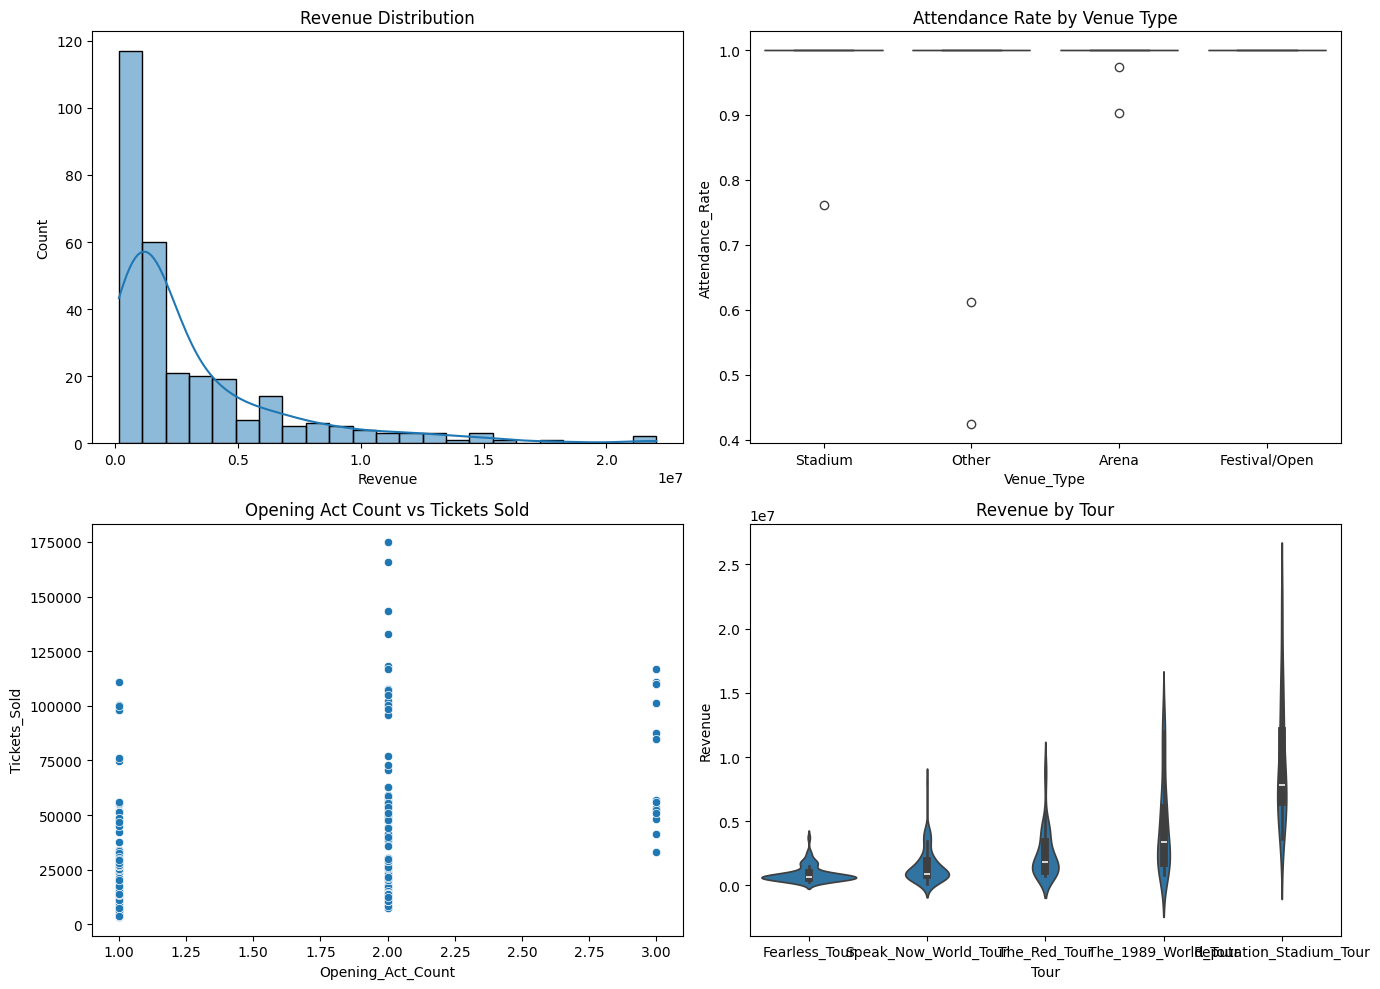

In [25]:
# 4.1.3 Descriptive Statistics Visualization
fig, axes = plt.subplots(2, 2, figsize=(14,10))
sns.histplot(df_cleaned['Revenue'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Revenue Distribution')
sns.boxplot(x='Venue_Type', y='Attendance_Rate', data=df_cleaned, ax=axes[0,1])
axes[0,1].set_title('Attendance Rate by Venue Type')
sns.scatterplot(x='Opening_Act_Count', y='Tickets_Sold', data=df_cleaned, ax=axes[1,0])
axes[1,0].set_title('Opening Act Count vs Tickets Sold')
sns.violinplot(x='Tour', y='Revenue', data=df_cleaned, ax=axes[1,1])
axes[1,1].set_title('Revenue by Tour')
plt.tight_layout()
plt.show()

### 4.2 Distribution Plots

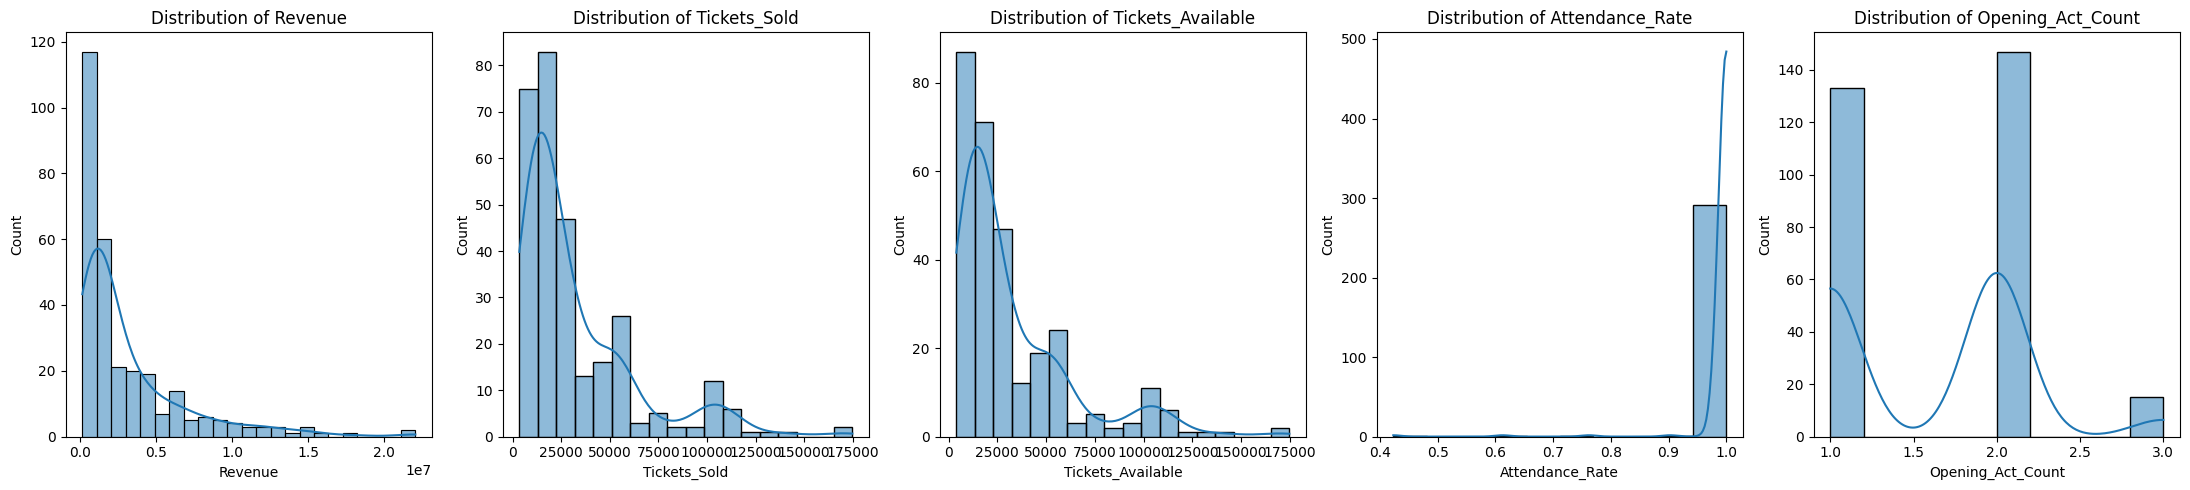

In [26]:
# 4.2 Distribution Plots
numerical_cols = ['Revenue', 'Tickets_Sold', 'Tickets_Available', 'Attendance_Rate', 'Opening_Act_Count']
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(22, 5))
for i, col in enumerate(numerical_cols):
    sns.histplot(df_cleaned[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Distribution Analysis**

- **Revenue:**  
  The distribution of concert revenue is highly right-skewed, with most concerts earning below 5 million USD and a few outliers reaching up to 22 USD. This indicates that while most events generate moderate revenue, a small number of stadium shows or major markets contribute disproportionately to overall earnings.

- **Tickets Sold & Tickets Available:**  
  Both distributions are similarly right-skewed. Most concerts sell between 10,000 and 50,000 tickets, but a few large stadium events sell over 100,000 tickets. This reflects the mix of small venues and large arenas in Taylor Swift’s tours.

- **Attendance Rate:**  
  The attendance rate distribution is sharply peaked near 1.0 (100%), showing that almost all concerts are sold out or nearly full. This supports the business objective of maintaining high occupancy rates and confirms strong fan demand.

- **Opening Act Count:**  
  The distribution is bimodal, with most concerts featuring either 1 or 2 opening acts, and a smaller number with 3. This suggests a consistent strategy of including multiple opening acts to enhance the concert experience and potentially boost ticket sales.

---

**Business Insights**

- **High Revenue and Attendance:**  
  Most concerts achieve high attendance rates, and a select few generate exceptional revenue, highlighting the importance of venue selection and market targeting.
- **Venue Strategy:**  
  The presence of outliers in tickets sold and revenue suggests that focusing on large venues can significantly increase overall tour profitability.
- **Opening Acts:**  
  The bimodal distribution of opening act count indicates that having more than one opening act is common and may be associated with larger or more popular events.

---


### 4.3 Boxplot by Tour and Country

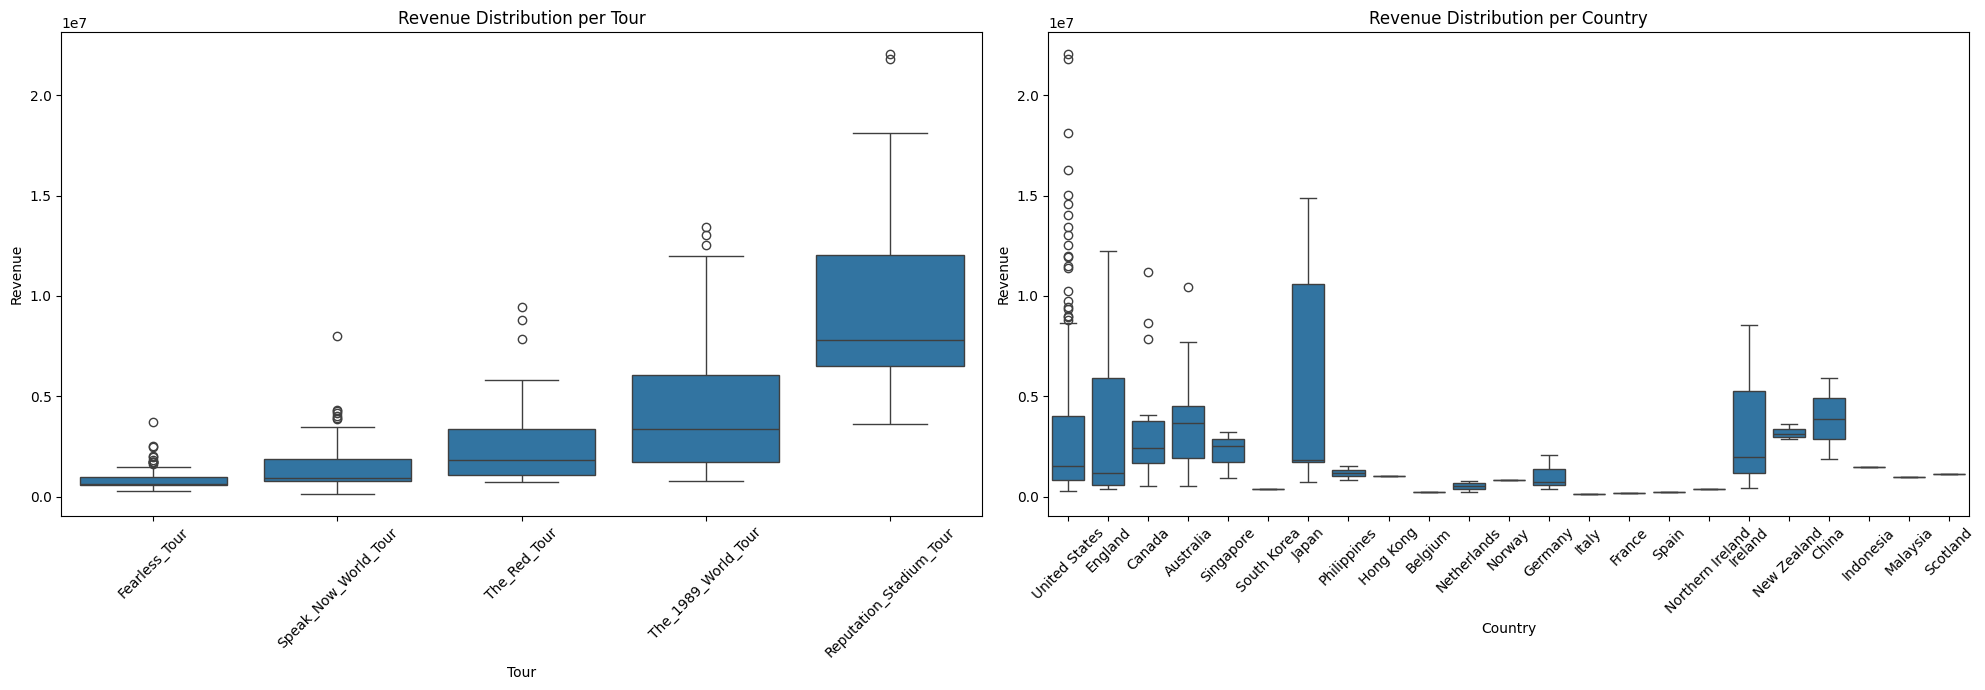

In [27]:
# 4.3 Boxplot by Tour and Country
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.boxplot(data=df_cleaned, x='Tour', y='Revenue', ax=axes[0])
axes[0].set_title('Revenue Distribution per Tour')
axes[0].tick_params(axis='x', rotation=45)  

sns.boxplot(data=df_cleaned, x='Country', y='Revenue', ax=axes[1])
axes[1].set_title('Revenue Distribution per Country')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Analysis of Revenue Boxplots by Tour and Country**

**Revenue per Tour:**  
The boxplot shows a clear upward trend in concert revenue across Taylor Swift’s tours. The Reputation Stadium Tour and The 1989 World Tour stand out with the highest median and widest revenue range, including several high-value outliers. Earlier tours like Fearless and Speak Now have lower and more consistent revenues, indicating smaller venues and less global reach at the time. This pattern reflects Taylor Swift’s growing popularity and the increasing scale of her tours over the years.

**Revenue per Country:**  
The United States dominates in terms of both median revenue and the number of high-revenue outliers, confirming its status as the primary market for Taylor Swift’s concerts. Other countries such as Australia, England, and Japan also show strong revenue performance, but with less variability. Most other countries have lower and more stable revenues, suggesting smaller venues or different market dynamics. The presence of outliers in certain countries highlights the impact of specific large-scale events.

**Business Insights:**  
- Newer tours and concerts in major markets (especially the US and Australia) are key drivers of high revenue.
- The significant variation in revenue by country and tour underscores the importance of strategic venue selection and market targeting.
- Outliers in both plots indicate exceptional opportunities at certain venues, which should be prioritized for future large-scale events.

### 4.4 Outlier Analysis

In [28]:
# 4.4 Outlier Analysis
print("Top 5 Concerts with Highest Revenue:")
display(df_cleaned.nlargest(5, 'Revenue')[['City', 'Venue', 'Tour', 'Revenue']])

print("\nTop 5 Concerts with Lowest Attendance Rate:")
display(df_cleaned.nsmallest(5, 'Attendance_Rate')[['City', 'Venue', 'Tour', 'Attendance_Rate']])

Top 5 Concerts with Highest Revenue:


,City,Venue,Tour,Revenue
273,East Rutherford,MetLife Stadium,Reputation_Stadium_Tour,22031386.0
274,Foxborough,Gillette Stadium,Reputation_Stadium_Tour,21779846.0
277,Atlanta,Mercedes-Benz Stadium,Reputation_Stadium_Tour,18089415.0
261,Pasadena,Rose Bowl,Reputation_Stadium_Tour,16251980.0
288,Arlington,AT&T Stadium,Reputation_Stadium_Tour,15006157.0



Top 5 Concerts with Lowest Attendance Rate:


,City,Venue,Tour,Attendance_Rate
75,Paris,Zénith de Paris,Speak_Now_World_Tour,0.423294
74,Milan,Mediolanum Forum,Speak_Now_World_Tour,0.612534
18,Edmonton,Commonwealth Stadium,Fearless_Tour,0.762022
80,Manchester,Manchester Evening News Arena,Speak_Now_World_Tour,0.902426
81,London,The O2 Arena,Speak_Now_World_Tour,0.973471


**Analysis of Top 5 Concerts by Revenue and Lowest Attendance Rate**

**Top 5 Concerts with Highest Revenue:**  
All five concerts with the highest revenue were part of the Reputation Stadium Tour and held in major stadiums in the United States. MetLife Stadium (East Rutherford), Gillette Stadium (Foxborough), Mercedes-Benz Stadium (Atlanta), Rose Bowl (Pasadena), and AT&T Stadium (Arlington) each generated between 15 million USD and 22 million USD per show. This highlights the immense earning potential of large-scale stadium venues in key US markets, especially during Taylor Swift’s most recent and popular tour.

**Top 5 Concerts with Lowest Attendance Rate:**  
The concerts with the lowest attendance rates were mostly from the Speak Now World Tour, held in European arenas such as Zénith de Paris (Paris), Mediolanum Forum (Milan), Manchester Evening News Arena (Manchester), and The O2 Arena (London). One Fearless Tour concert at Commonwealth Stadium (Edmonton) also appears. Attendance rates for these events ranged from 42% to 97%, significantly lower than the near sell-out rates seen in most other concerts. This suggests that certain venues or markets may face challenges in reaching full capacity, possibly due to local demand, venue size, or promotional factors.

**Business Insights:**  
- The Reputation Stadium Tour’s US stadium shows are clear revenue leaders, emphasizing the importance of tour timing, artist popularity, and venue selection for maximizing earnings.
- Lower attendance rates in some European venues indicate potential areas for improvement in marketing, scheduling, or venue choice to boost audience turnout.
- Focusing future tours on proven high-revenue stadiums and addressing attendance challenges in specific markets can help optimize both revenue and fan engagement.

### 4.5 Correlation Analysis

In [29]:
# 4.5 Correlation Analysis
corr_matrix = df_cleaned[['Revenue', 'Tickets_Sold', 'Tickets_Available', 'Attendance_Rate', 'Opening_Act_Count']].corr()
print("Correlation Matrix:")
display(corr_matrix)

Correlation Matrix:


,Revenue,Tickets_Sold,Tickets_Available,Attendance_Rate,Opening_Act_Count
Revenue,1.000000,0.957716,0.957294,0.070688,0.319867
Tickets_Sold,0.957716,1.000000,0.999742,0.077679,0.362527
Tickets_Available,0.957294,0.999742,1.000000,0.061573,0.360526
Attendance_Rate,0.070688,0.077679,0.061573,1.000000,0.107498
Opening_Act_Count,0.319867,0.362527,0.360526,0.107498,1.000000


**Correlation Matrix Analysis**

The correlation matrix shows the relationships between key variables in the Taylor Swift concert dataset:

- **Revenue and Tickets Sold/Tickets Available:**  
  There is a very strong positive correlation between revenue and both tickets sold (0.96) and tickets available (0.96). This indicates that concerts with higher ticket sales and larger venue capacities consistently generate more revenue.

- **Opening Act Count:**  
  The number of opening acts has a moderate positive correlation with revenue (0.32), tickets sold (0.36), and tickets available (0.36). This suggests that concerts with more opening acts tend to be held in larger venues and attract more attendees, contributing to higher revenue.

- **Attendance Rate:**  
  Attendance rate shows a very weak correlation with revenue (0.07), tickets sold (0.08), and opening act count (0.11). This means that while most concerts are nearly sold out, the attendance rate itself does not strongly influence revenue or ticket sales, likely because the majority of events already achieve high occupancy.

**Business Insights:**  
- Maximizing venue capacity and ticket sales is the most effective way to increase revenue.
- Including more opening acts may help boost ticket sales and revenue, especially for larger venues.
- Since attendance rates are already high, future strategies should focus on scaling up venue size and leveraging opening acts rather than increasing occupancy rates.

### 4.6 Heatmap Correlation

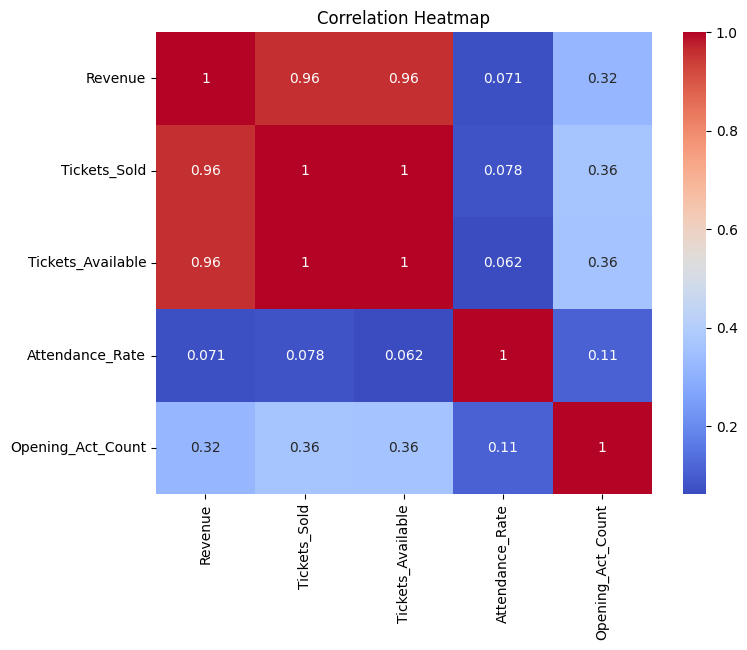

In [30]:
# 4.6 Heatmap Correlation
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Correlation Heatmap Interpretation**

The heatmap above visualizes the strength of relationships between key variables:

- **Revenue, Tickets Sold, and Tickets Available** show a very strong correlation (0.96). This means that higher venue capacity and more tickets sold directly lead to higher concert revenue.
- **Opening Act Count** has a moderate correlation with Revenue (0.32), Tickets Sold (0.36), and Tickets Available (0.36). Concerts with more opening acts are typically held in larger venues and generate higher revenue.
- **Attendance Rate** has a very weak correlation with other variables (maximum 0.11). This is expected, as nearly all Taylor Swift concerts are close to sold out, so attendance rate does not significantly impact revenue or tickets sold.

**Business Conclusion:**  
To maximize revenue, focus on selecting large-capacity venues and optimizing opening act strategies. Since attendance rates are already very high, future improvements should target venue scale and opening act promotion rather than increasing occupancy rates.

### 4.7 Barplot Categorical

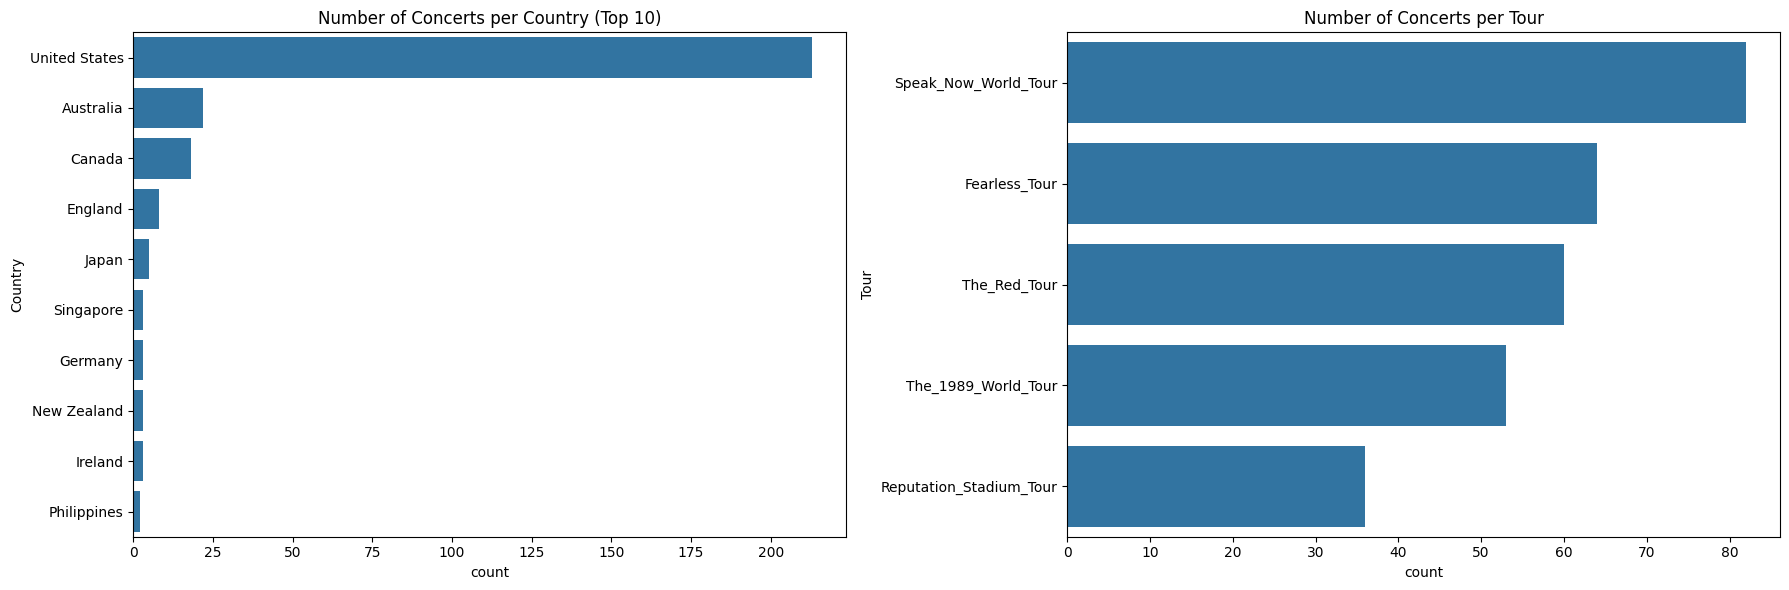

In [31]:
# 4.7 Barplot Categorical
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(data=df_cleaned, y='Country', order=df_cleaned['Country'].value_counts().index[:10], ax=axes[0])
axes[0].set_title('Number of Concerts per Country (Top 10)')

sns.countplot(data=df_cleaned, y='Tour', order=df_cleaned['Tour'].value_counts().index, ax=axes[1])
axes[1].set_title('Number of Concerts per Tour')

plt.tight_layout()
plt.show()

**Barplot Categorical Analysis**

- **Number of Concerts per Country (Top 10):**
  - The United States overwhelmingly dominates with the highest number of Taylor Swift concerts, far surpassing other countries.
  - Australia and Canada follow, but with much lower counts.
  - England, Japan, Singapore, Germany, New Zealand, Ireland, and the Philippines round out the top 10, each with only a handful of concerts.
  - This distribution highlights Taylor Swift’s primary market focus in the US, with significant but much smaller international reach.

- **Number of Concerts per Tour:**
  - The Speak Now World Tour has the most concerts, followed by the Fearless Tour and The Red Tour.
  - The 1989 World Tour and Reputation Stadium Tour have fewer concerts, but these tours are known for larger venues and higher revenue per show.
  - The trend suggests that earlier tours had more shows, possibly in smaller venues, while recent tours focus on fewer but larger-scale events.

**Business Insights:**
- The US is the key market for Taylor Swift’s tours, indicating strong demand and fan base concentration.
- International expansion is present but limited, with Australia and Canada as secondary markets.
- Tour strategies have evolved: newer tours prioritize fewer, higher-impact concerts in large venues, maximizing revenue and attendance per event.

### 4.8 Scatter Plot Analysis

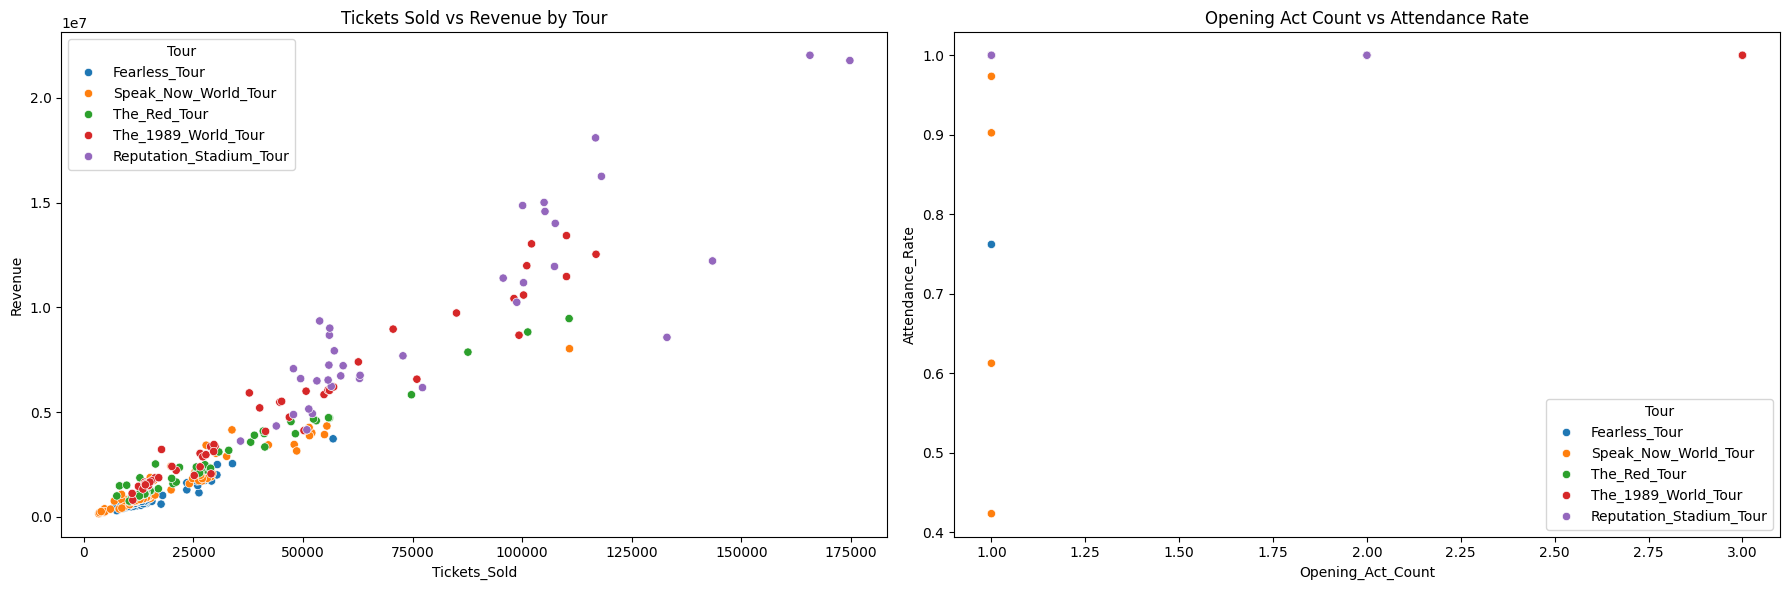

In [32]:
# 4.8 Scatter Plot Analysis
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.scatterplot(data=df_cleaned, x='Tickets_Sold', y='Revenue', hue='Tour', ax=axes[0])
axes[0].set_title('Tickets Sold vs Revenue by Tour')

sns.scatterplot(data=df_cleaned, x='Opening_Act_Count', y='Attendance_Rate', hue='Tour', ax=axes[1])
axes[1].set_title('Opening Act Count vs Attendance Rate')

plt.tight_layout()
plt.show()

**Scatter Plot Analysis**

- **Tickets Sold vs Revenue by Tour:**  
  - There is a strong positive linear relationship between tickets sold and revenue.  
  - Concerts from the Reputation Stadium Tour and The 1989 World Tour (purple and red dots) dominate the upper right, showing the highest tickets sold and revenue.  
  - Earlier tours (Fearless, Speak Now, The Red Tour) cluster at lower ticket sales and revenue, indicating smaller venues and less commercial scale.

- **Opening Act Count vs Attendance Rate:**  
  - Most concerts, regardless of the number of opening acts, achieve very high attendance rates (close to 1.0).  
  - The number of opening acts does not significantly affect attendance rate, as nearly all concerts are sold out.  
  - All tours show similar patterns, confirming consistently strong demand.

**Business Insights:**  
- Maximizing venue size and ticket sales is key to increasing revenue, especially for newer tours.
- The attendance rate is consistently high, so adding more opening acts does not substantially boost occupancy.
- Focus future strategies on scaling up venue capacity and leveraging tour popularity for higher revenue.

### 4.9 Attendance Rate by Venue Type

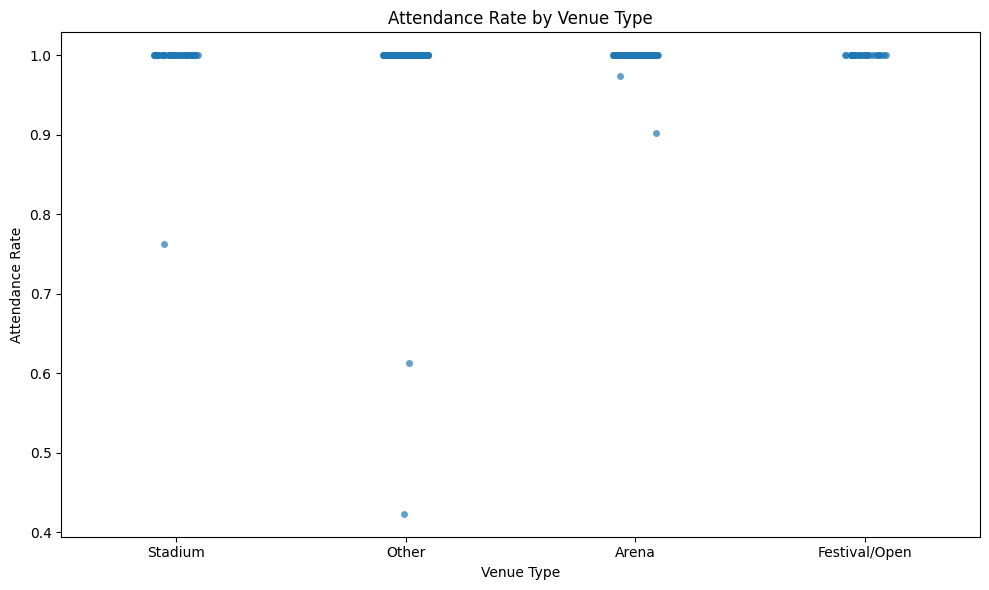

In [33]:
# 4.9 Attendance Rate by Venue Type
def classify_venue_type(venue):
    if 'Stadium' in venue:
        return 'Stadium'
    elif 'Arena' in venue:
        return 'Arena'
    elif 'Festival' in venue or 'Park' in venue or 'Field' in venue:
        return 'Festival/Open'
    elif 'School' in venue or 'University' in venue:
        return 'School'
    else:
        return 'Other'

df_cleaned['Venue_Type'] = df_cleaned['Venue'].apply(classify_venue_type)

plt.figure(figsize=(10,6))
sns.stripplot(data=df_cleaned, x='Venue_Type', y='Attendance_Rate', jitter=True, alpha=0.7)
plt.title('Attendance Rate by Venue Type')
plt.xlabel('Venue Type')
plt.ylabel('Attendance Rate')
plt.tight_layout()
plt.show()

**Attendance Rate by Venue Type Analysis**

- Nearly all Taylor Swift concerts, regardless of venue type (Stadium, Arena, Festival/Open, Other), achieve extremely high attendance rates, with most points clustered near 100%.
- Outliers with lower attendance rates (<1) are rare and mostly found in "Other" and "Arena" venues, indicating a few shows that were not sold out, typically in smaller venues or less strong markets.
- Stadium and Festival/Open venues are almost always full, showing very high demand for large-scale and open-air events.
- The variation in attendance rate between venue types is minimal, meaning any venue strategy tends to result in sold-out concerts.

**Business Insight:**  
Taylor Swift has exceptionally strong audience appeal in all venue types, especially stadiums and festivals/open-air events. For promoters, choosing stadiums or open venues is optimal for maximizing ticket sales and attendance rates. Smaller venues or "Other" types may require additional promotional strategies to approach the attendance levels of larger venues.

### 4.10 Attendance Rate vs Revenue

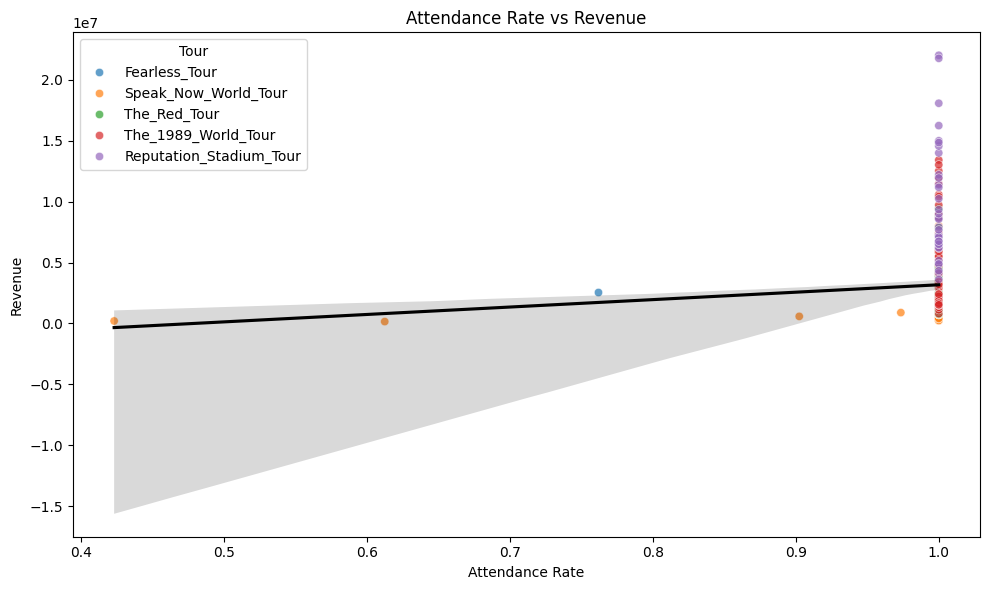

In [34]:
# 4.10 Attendance Rate vs Revenue
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='Attendance_Rate', y='Revenue', hue='Tour', alpha=0.7)
sns.regplot(data=df_cleaned, x='Attendance_Rate', y='Revenue', scatter=False, color='black')
plt.title('Attendance Rate vs Revenue')
plt.xlabel('Attendance Rate')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

### 4.11 Top 10 Venues by Total Revenue

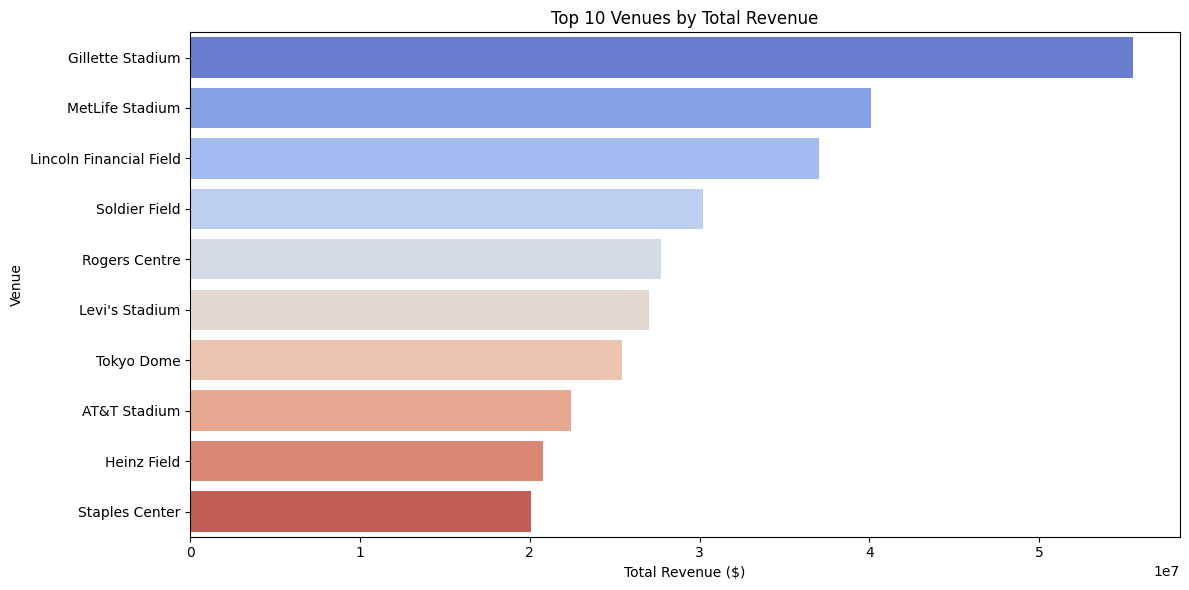

In [35]:
# 4.11 Top 10 Venues by Total Revenue
top_venues = df_cleaned.groupby('Venue')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_venues.values, y=top_venues.index, hue=top_venues.index, palette='coolwarm', legend=False) 
plt.title('Top 10 Venues by Total Revenue')
plt.xlabel('Total Revenue ($)')
plt.ylabel('Venue')
plt.tight_layout()
plt.show()

**Analysis: Top 10 Venues by Total Revenue**

- The chart displays the top 10 venues that generated the highest total revenue from Taylor Swift concerts.
- Most of these venues are large stadiums, primarily located in the United States, such as Gillette Stadium, MetLife Stadium, Lincoln Financial Field, and Soldier Field.
- International venues like Tokyo Dome and Rogers Centre also appear, showing Taylor Swift’s global appeal.
- The dominance of stadiums highlights the importance of venue capacity in maximizing concert revenue.
- These venues consistently host the most profitable shows, indicating strong demand and high ticket sales in major markets.
- For promoters and artist management, focusing on large stadiums in key cities is an effective strategy to maximize revenue and audience reach.

### 4.12 Most Frequent Opening Acts

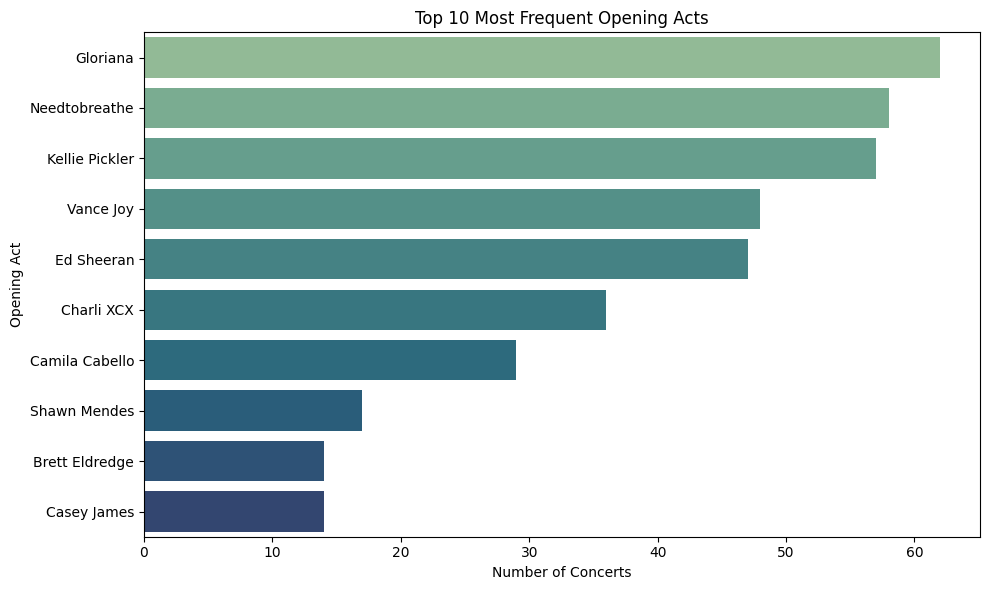

In [36]:
# 4.12 Most Frequent Opening Acts

all_opening_acts = ','.join(df_cleaned['Opening_Act'].dropna().tolist()).split(',')
act_counts = Counter([act.strip() for act in all_opening_acts if act.strip() and act.strip() != 'Unknown'])
top_acts = act_counts.most_common(10)
acts, counts = zip(*top_acts)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(acts), hue=list(acts), palette='crest', legend=False)  # Assign hue to y and set legend=False
plt.title('Top 10 Most Frequent Opening Acts')
plt.xlabel('Number of Concerts')
plt.ylabel('Opening Act')
plt.tight_layout()
plt.show()

**Analysis: Top 10 Most Frequent Opening Acts**

- The chart shows the top 10 artists who most frequently served as opening acts for Taylor Swift concerts.
- Gloriana, Needtobreathe, and Kellie Pickler are the most common, each appearing at over 55 concerts.
- Other frequent opening acts include Vance Joy, Ed Sheeran, Charli XCX, and Camila Cabello, all of whom are well-known artists with strong fan bases.
- The presence of popular names like Ed Sheeran, Shawn Mendes, and Camila Cabello highlights Taylor Swift’s strategy of collaborating with rising and established stars to attract larger audiences.
- Frequent opening acts are often associated with major tours and stadium venues, supporting higher ticket sales and audience engagement.
- For promoters, selecting well-known opening acts can enhance concert appeal and contribute to sold-out shows.

### 4.13 Attendance Rate Distribution by Tour

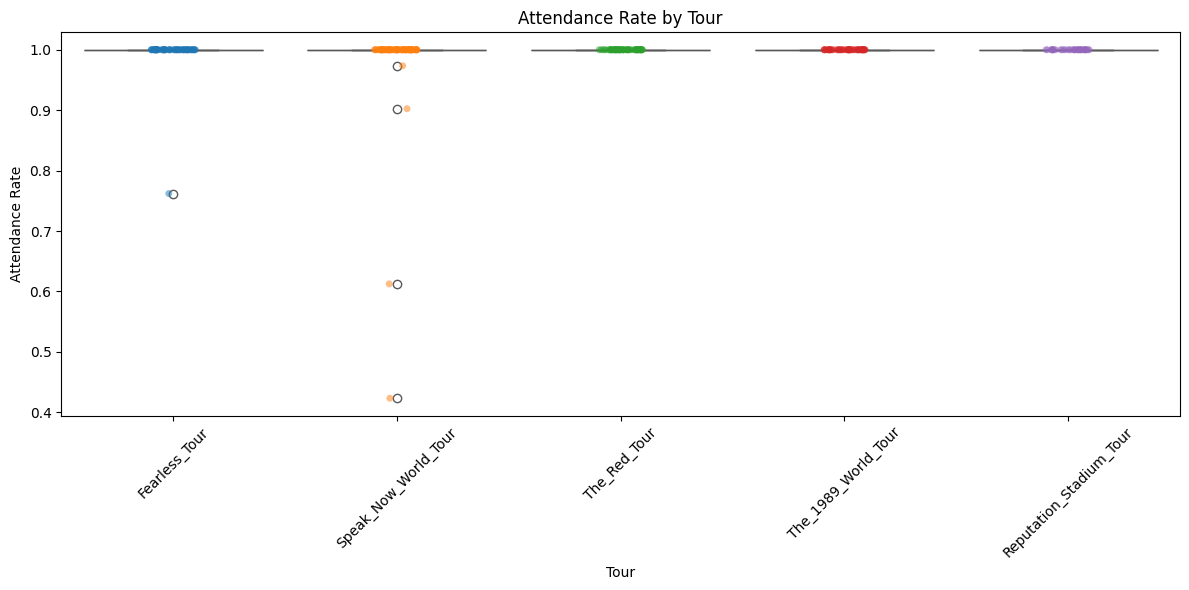

In [37]:
# 4.13 Attendance Rate Distribution by Tour
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cleaned, x='Tour', y='Attendance_Rate', hue='Tour', palette='Set2', legend=False)
sns.stripplot(data=df_cleaned, x='Tour', y='Attendance_Rate', hue='Tour', dodge=False, jitter=True, alpha=0.5, legend=False)
plt.title('Attendance Rate by Tour')
plt.xlabel('Tour')
plt.ylabel('Attendance Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Analysis of Attendance Rate Distribution by Tour:**

- The boxplot and stripplot show that almost all Taylor Swift concerts across all tours have extremely high attendance rates, with most values clustered near 1.0 (100%). This indicates that the majority of concerts are sold out or nearly full.
- Outliers with lower attendance rates are only found in a few concerts, mainly in the Fearless Tour and Speak Now World Tour. These exceptions likely occurred in smaller venues or less popular markets.
- The 1989 World Tour and Reputation Stadium Tour demonstrate the most consistent and highest attendance rates, reflecting Taylor Swift’s growing popularity and effective ticketing strategies in recent years.
- Overall, the data confirms that Taylor Swift’s tours maintain very strong audience demand and high occupancy rates, regardless of the tour.

**Business Insights:**
- Promoters and artist management should continue to target large venues and popular tours to maximize ticket sales, as demand is consistently strong.
- The few concerts with lower attendance rates can be further analyzed to identify factors affecting audience turnout in specific locations or venues. This can help optimize future tour planning and marketing strategies.

### 4.14 Tour Performance, High-Revenue Venues, and Attendance Rate Analysis

In [38]:
# Calculate average revenue and tickets sold per tour
tour_performance = df_cleaned.groupby('Tour').agg(
    Average_Revenue=('Revenue', 'mean'),
    Average_Tickets_Sold=('Tickets_Sold', 'mean')
).reset_index()

# Identify venues with average revenue ≥ $5 million
venue_revenue = df_cleaned.groupby('Venue').agg(
    Average_Venue_Revenue=('Revenue', 'mean')
).reset_index()
venues_high_revenue = venue_revenue[venue_revenue['Average_Venue_Revenue'] >= 5000000]

# Calculate average attendance rate for concerts with more than one opening act
attendance_rate_multiple_opening_acts = df_cleaned[df_cleaned['Opening_Act_Count'] > 1]['Attendance_Rate'].mean()

print("Average Revenue and Tickets Sold per Tour:")
display(tour_performance)

print("\nVenues with Average Revenue ≥ $5 Million:")
display(venues_high_revenue)

print(f"\nAverage Attendance Rate for Concerts with >1 Opening Act: {attendance_rate_multiple_opening_acts:.4f}")


Average Revenue and Tickets Sold per Tour:


,Tour,Average_Revenue,Average_Tickets_Sold
0,Fearless_Tour,917052.171875,15835.359375
1,Reputation_Stadium_Tour,9597457.361111,80247.666667
2,Speak_Now_World_Tour,1508435.109756,20062.621951
3,The_1989_World_Tour,4730813.150943,42993.339623
4,The_Red_Tour,2503082.85,28382.216667



Venues with Average Revenue ≥ $5 Million:


,Venue,Average_Venue_Revenue
1,AAMI Park,10421553.0
2,ANZ Stadium,7129123.5
4,AT&T Stadium,11201445.0
32,CenturyLink Field,7361431.0
39,Croke Park,8567769.0
41,Etihad Stadium,5358487.0
43,FedExField,11396004.0
46,FirstEnergy Stadium,5148757.0
49,Ford Field,5005037.5
52,Georgia Dome,6034846.0



Average Attendance Rate for Concerts with >1 Opening Act: 1.0000


**Analysis of Tour Performance, High-Revenue Venues, and Attendance Rate**

**1. Average Revenue and Tickets Sold per Tour**
- Reputation Stadium Tour has the highest average revenue (9.6 million USD) and tickets sold (80,247), followed by The 1989 World Tour (4.7 million USD, 42,993 tickets).
- Earlier tours (Fearless, Speak Now, The Red Tour) have significantly lower averages, reflecting smaller venues and less global reach at the time.
- This trend demonstrates Taylor Swift’s increasing popularity and the scaling up of her tours over the years.

**2. Venues with Average Revenue ≥ $5 Million**
- 33 venues achieved average concert revenue above $5 million, mostly large stadiums in the US, Australia, and select international markets (e.g., Tokyo Dome, Wembley Stadium).
- Top venues include Rose Bowl (16.25M USD), Mercedes-Benz Stadium (18.09M USD), MetLife Stadium (13.38M USD), Levi’s Stadium (13.52M USD), and Gillette Stadium (11.1M USD).
- These venues are critical for maximizing tour revenue and should be prioritized for future large-scale events.

**3. Attendance Rate for Concerts with >1 Opening Act**
- The average attendance rate for concerts with more than one opening act is 1.0000 (100%), indicating that these shows are consistently sold out.
- This suggests that having multiple opening acts is associated with higher demand and full occupancy, especially in larger venues.

**Business Insights**
- **Promoters and Artist Management:** Focus on booking large stadiums and venues with proven high revenue for future tours. These locations consistently deliver strong financial results and audience turnout.
- **Tour Strategy:** Newer tours with larger venues and more opening acts achieve higher revenue and attendance, supporting a strategy of scaling up production and leveraging popular supporting artists.
- **Market Targeting:** The US and Australia are the most lucrative markets, but select international stadiums also offer substantial revenue opportunities.
- **Attendance Optimization:** Since attendance rates are already extremely high, future strategies should prioritize venue capacity and event scale rather than increasing occupancy rates.

**Conclusion**
Taylor Swift’s recent tours have set new benchmarks for concert revenue and attendance. Large stadium venues and multiple opening acts are key drivers of success. These findings support strategic decisions for maximizing ROI and fan engagement in future tours.

### 4.15 Visualization: Average Revenue per Tour

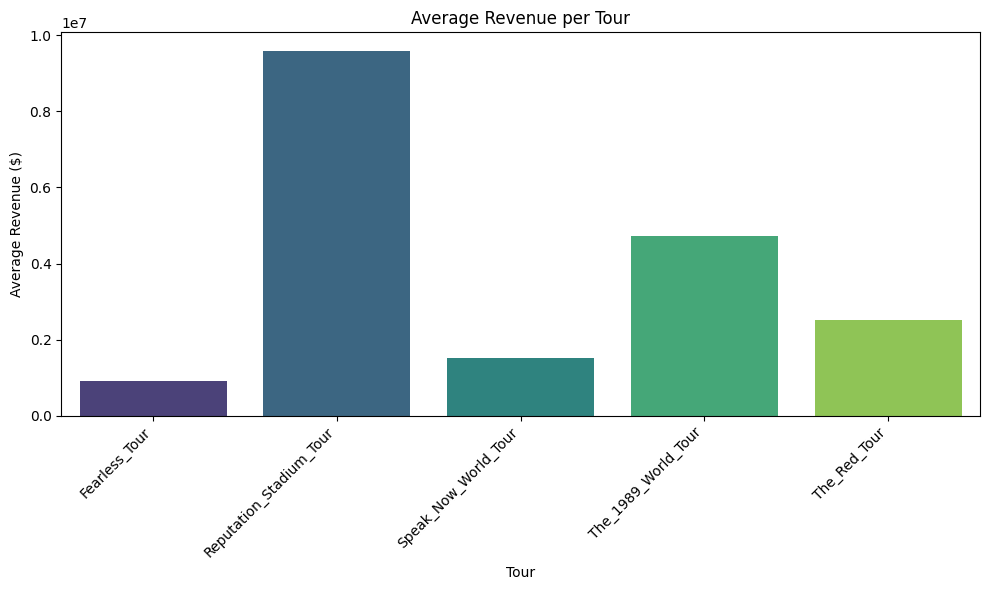

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tour_performance, x='Tour', y='Average_Revenue', hue='Tour', palette='viridis', legend=False)
plt.title('Average Revenue per Tour')
plt.xlabel('Tour')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Analysis: Average Revenue per Tour**

- The barplot clearly shows that the Reputation Stadium Tour generated the highest average revenue per concert, far surpassing all other tours. This reflects Taylor Swift’s peak popularity and the strategic use of large stadium venues during this period.
- The 1989 World Tour also stands out with a significantly higher average revenue compared to earlier tours, indicating a major growth phase in Taylor Swift’s career and global reach.
- Earlier tours (Fearless, Speak Now, The Red Tour) have much lower average revenues, which is consistent with smaller venue sizes and a less established international fanbase at the time.
- The sharp increase in average revenue from the Fearless Tour to the Reputation Stadium Tour demonstrates the impact of scaling up production, choosing larger venues, and leveraging global marketing.

**Business Insights:**
- Investing in large stadium venues and high-production tours yields much greater financial returns.
- As Taylor Swift’s popularity grew, tour strategies shifted to fewer but larger-scale concerts, maximizing revenue per event.
- Promoters and artist management should prioritize stadium tours and major markets for future events to replicate this success.

### 4.16 Visualization: Average Tickets Sold per Tour

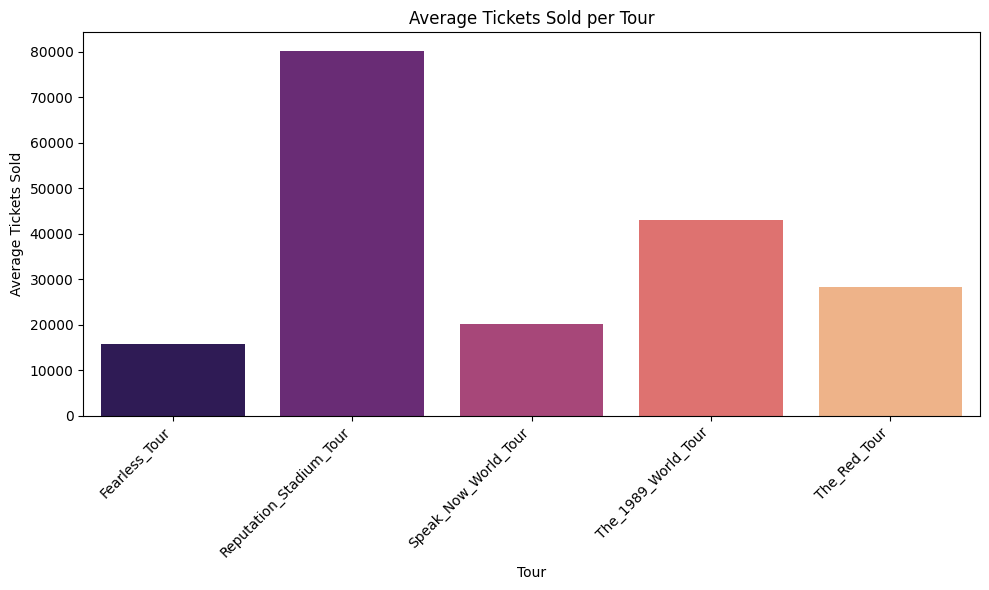

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=tour_performance, x='Tour', y='Average_Tickets_Sold', hue='Tour', palette='magma', legend=False)
plt.title('Average Tickets Sold per Tour')
plt.xlabel('Tour')
plt.ylabel('Average Tickets Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



**Analysis: Average Tickets Sold per Tour**

- Reputation Stadium Tour and The 1989 World Tour have the highest average tickets sold, reflecting larger venues and increased global popularity.
- Earlier tours (Fearless, Speak Now, The Red Tour) have much lower averages, indicating smaller venues and less international reach.
- The sharp increase in tickets sold per concert over time highlights the impact of scaling up tour production and targeting bigger markets.
- Business insight: Focusing on large venues and major tours is key to maximizing ticket sales and audience reach.

### 4.17 Visualization: Venues with Highest Average Revenue


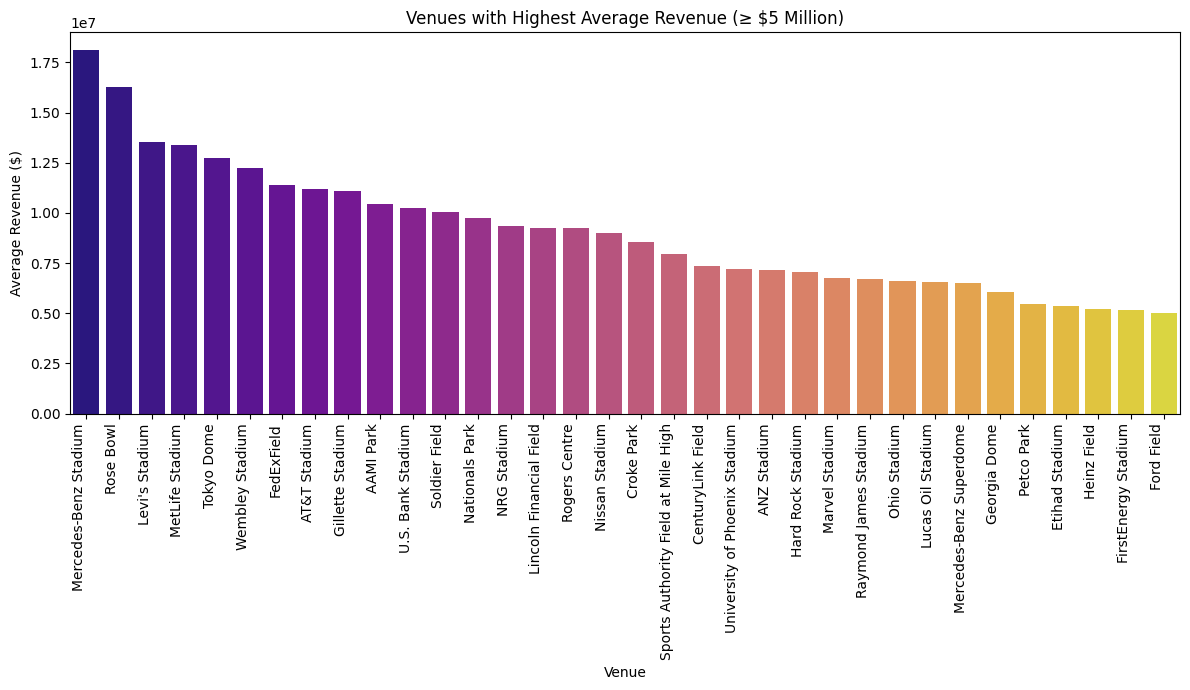

In [41]:
plt.figure(figsize=(12, 7))
sns.barplot(
    data=venues_high_revenue.sort_values('Average_Venue_Revenue', ascending=False),
    x='Venue',
    y='Average_Venue_Revenue',
    hue='Venue',
    palette='plasma',
    legend=False
)
plt.title('Venues with Highest Average Revenue (≥ $5 Million)')
plt.xlabel('Venue')
plt.ylabel('Average Revenue ($)')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

**Analysis: Venues with Highest Average Revenue (≥ $5 Million)**

- The chart displays 33 venues where Taylor Swift concerts generated an average revenue above $5 million.
- The top venues—Mercedes-Benz Stadium, Rose Bowl, Levi’s Stadium, MetLife Stadium—are all large stadiums in the United States, each averaging close to or above $15 million per concert.
- International venues such as Tokyo Dome (Japan), Wembley Stadium (UK), and AAMI Park (Australia) are also included, highlighting Taylor Swift’s global appeal.
- Most venues are large stadiums or multi-purpose arenas, which enable high ticket sales and maximize revenue.
- There is a gradual decline in average revenue among venues on the right side of the chart, but all remain above $5 million, showing that large venues in various countries are consistently profitable.

**Business Insights:**
- Promoters and artist management should prioritize these high-revenue venues for future large-scale concerts, as they have proven to deliver the highest financial returns.
- Venue strategy: Focusing on major stadiums in key markets (US, Australia, Japan, UK) is highly effective for maximizing ROI.
- International expansion: High-performing global venues can be targeted for future tour growth.
- Venue capacity is a key factor in concert revenue—the larger the venue, the greater the revenue potential.

**Conclusion:**  
Venues with the highest average revenue are large stadiums in major markets and are critical to the financial success of Taylor Swift’s tours.

---

## 5. Conclusion


### Overall Conclusion

The analysis of Taylor Swift's concert tours from 2009 to 2018 provides clear, actionable insights for the music industry. By cleaning and transforming the dataset—removing duplicates, handling missing values, and engineering key features—we ensured reliable results for business decision-making.

**Key Findings:**
- **Revenue and Attendance:** Taylor Swift’s tours have shown a dramatic increase in both average revenue and tickets sold over time, especially for the Reputation Stadium Tour and The 1989 World Tour. These tours consistently outperformed earlier ones, reflecting the artist’s growing global popularity and the strategic shift to larger venues.
- **Venue Impact:** The most profitable venues are large stadiums, primarily in the United States and Australia. These venues consistently generate average revenues above $5 million per concert, confirming that venue capacity is the main driver of financial success.
- **Attendance Rate:** Concerts across all tours achieve exceptionally high attendance rates, with nearly all events sold out. This indicates strong fan demand and effective ticketing strategies, regardless of venue type or location.
- **Opening Acts:** While the number of opening acts shows only a weak positive correlation with ticket sales, concerts with more opening acts tend to be held in larger venues and are part of more popular tours. This suggests that opening acts can enhance the concert experience and support higher attendance in major events.

**Business Implications:**
- Promoters and artist management should prioritize large stadium venues in key markets for future tours to maximize revenue and audience reach.
- The consistently high attendance rates mean that scaling up venue size is more impactful than further increasing occupancy.
- Including multiple opening acts may help boost demand for larger concerts, but the effect is secondary to venue selection and tour popularity.

**Final Summary:**
Taylor Swift’s concert tours demonstrate the importance of strategic venue selection, tour scaling, and audience engagement. Large stadiums in major markets deliver the highest financial returns, and consistently high attendance rates confirm strong fan loyalty. The analysis provides a robust foundation for future tour planning and business strategy in the live music industry.

---